In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
tft = pd.read_csv("tft_database.csv")
tft.head()

,Champion,Origin,Class,Class2,Cost,DamagePerSecond,AttackSpeed,Damage,HP,Mana,Armor,MagicResist
0,Aatrox,Demon,Blademaster,NaN,3.0,42,0.65,65,700,75,25,20
1,Ahri,Wild,Sorcerer,NaN,2.0,28,0.55,50,450,75,20,20
2,Akali,Ninja,Assassin,NaN,4.0,49,0.70,70,650,25,20,20
3,Anivia,Glacial,Elementalist,NaN,5.0,24,0.60,40,650,100,20,20
4,Ashe,Glacial,Elementalist,NaN,3.0,46,0.70,65,550,100,20,20


Combinações podem ser feitas por Classe e Origem

In [4]:
tft.Class.describe()

count           51
unique          12
top       Sorcerer
freq             7
Name: Class, dtype: object

In [45]:
tft.Origin.describe()

count           51
unique          13
top       Glacial 
freq             7
Name: Origin, dtype: object

É necessário pensar na quantidade de ouro para fazer a composição

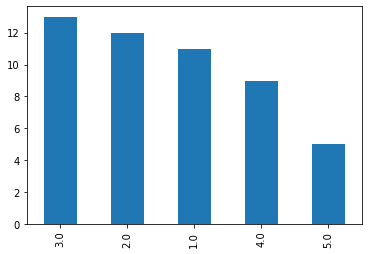

In [5]:
tft.Cost.value_counts().plot.bar()

#Gráficos do seaborn

Os status não são necessariamente proporcionais ao custo

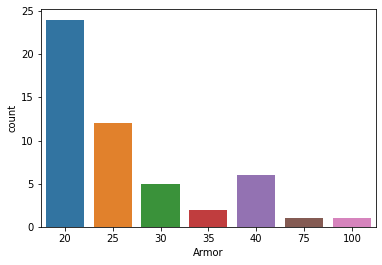

In [6]:
sns.countplot(x='Armor', data=tft)

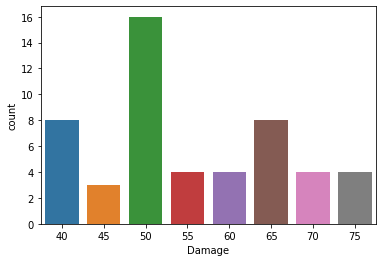

In [7]:
sns.countplot(x='Damage', data=tft)

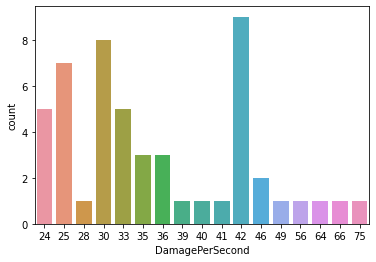

In [8]:
sns.countplot(x='DamagePerSecond', data=tft)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


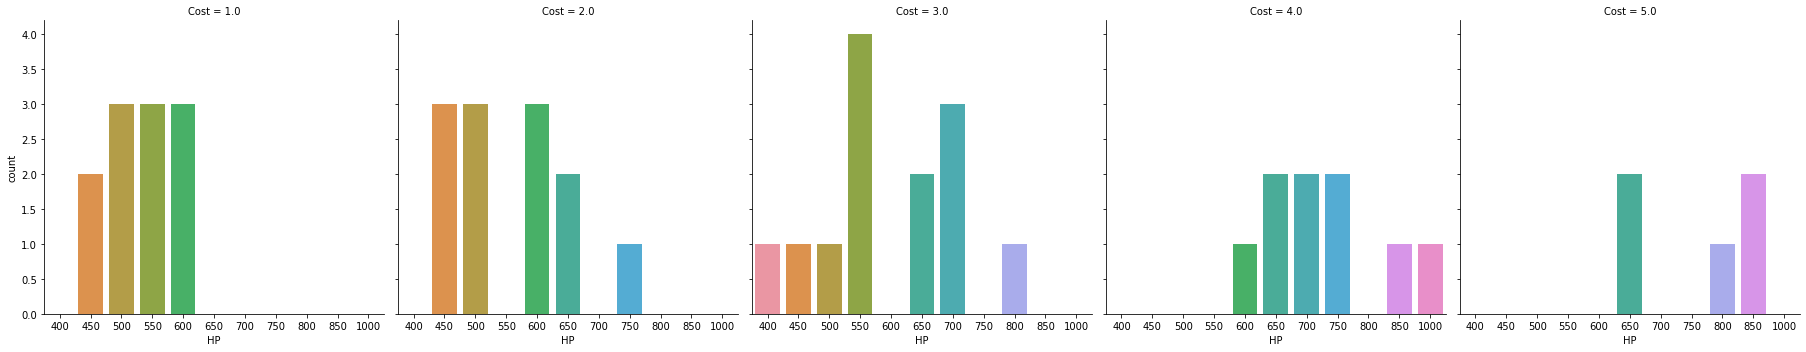

In [9]:
sns.factorplot(x='HP', col='Cost', kind= 'count', data=tft)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


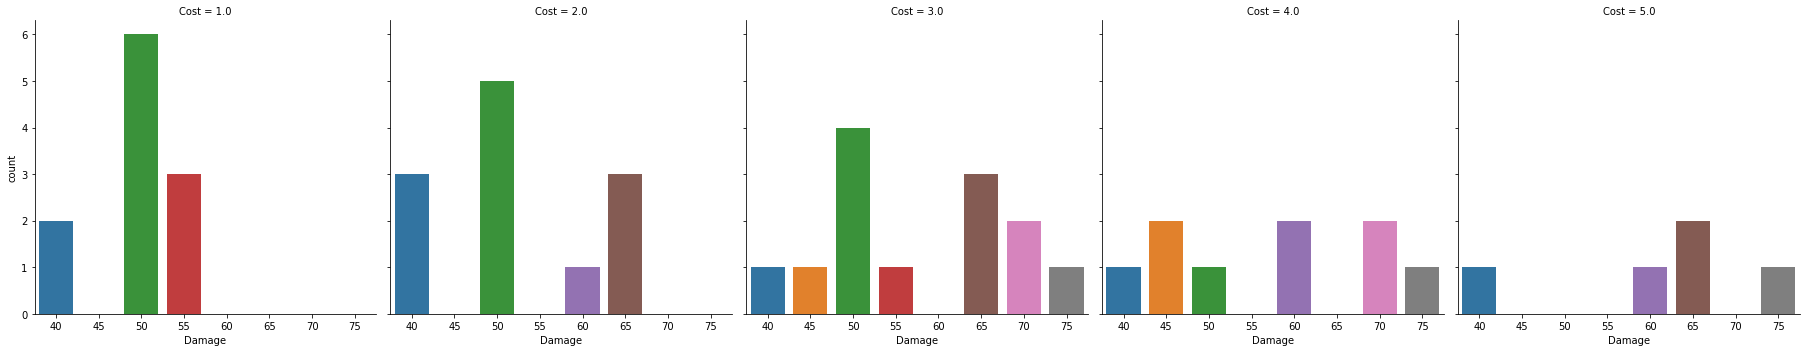

In [10]:
sns.factorplot(x='Damage', col='Cost', kind= 'count', data=tft)

Fazendo uma combinção

In [11]:
df_class = tft[tft.Class=='Sorcerer']
df_class

,Champion,Origin,Class,Class2,Cost,DamagePerSecond,AttackSpeed,Damage,HP,Mana,Armor,MagicResist
1,Ahri,Wild,Sorcerer,NaN,2.0,28,0.55,50,450,75,20,20
19,Karthus,Phantom,Sorcerer,NaN,5.0,42,0.65,65,850,85,25,20
20,Kassadin,Void,Sorcerer,NaN,1.0,33,0.60,55,550,0,25,20
29,Lulu,Yordle,Sorcerer,NaN,2.0,30,0.60,50,500,150,20,20
32,Morgana,Demon,Sorcerer,NaN,3.0,30,0.60,50,650,150,20,20
43,Twisted Fate,Pirate,Sorcerer,NaN,2.0,30,0.75,40,450,50,20,20
46,Veigar,Yordle,Sorcerer,NaN,3.0,25,0.55,45,500,75,20,20


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


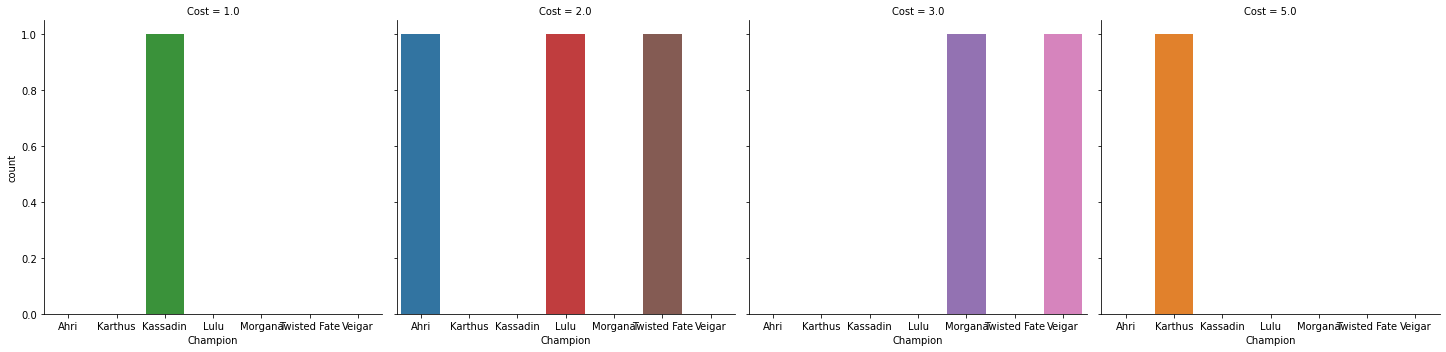

In [12]:
df_class = tft[tft.Class=='Sorcerer']
sns.factorplot(x='Champion', col='Cost', kind='count', data=df_class)

# Roteiro

1. Escolha uma classe de modelo importando do Scikit.
2. Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.
3. Organize os dados em uma *feature matrix* e um *target array*.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.

## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
model = GaussianNB()                       # 2. Escolha dos hiperparâmetros e intanciação.

In [40]:
# 3.1 Feature Matrix
X_tft = tft.loc[: ,  ["DamagePerSecond","AttackSpeed","Damage","HP","Mana","Armor","MagicResist"] ]
X_tft.head()

,DamagePerSecond,AttackSpeed,Damage,HP,Mana,Armor,MagicResist
0,42,0.65,65,700,75,25,20
1,28,0.55,50,450,75,20,20
2,49,0.70,70,650,25,20,20
3,24,0.60,40,650,100,20,20
4,46,0.70,65,550,100,20,20


In [15]:
# 3.2 Target Array
y_tft = tft.Class
y_tft.head()

0     Blademaster
1        Sorcerer
2        Assassin
3    Elementalist
4    Elementalist
Name: Class, dtype: object

In [0]:
# 3.3 Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_tft, y_tft, random_state=2020)

In [18]:
# 4 Ajuste o modelo aos dados
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# 5 Faça predições em dados novos
y_model = model.predict(Xtest)

In [20]:
y_model

array(['Elementalist', 'Assassin', 'Brawler', 'Brawler', 'Gunslinger',
       'Gunslinger', 'Elementalist', 'Gunslinger', 'Knight', 'Ranger',
       'Brawler', 'Sorcerer', 'Blademaster'], dtype='<U12')

In [21]:
ytest

46        Sorcerer
13        Assassin
35        Assassin
38          Knight
33    Shapeshifter
19        Sorcerer
12    Shapeshifter
0      Blademaster
16          Knight
43        Sorcerer
26        Guardian
18      Gunslinger
30      Gunslinger
Name: Class, dtype: object

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.15384615384615385

## Regressão Logística (Classificação)

In [23]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decisiont = DecisionTreeClassifier()       # 2
                                                 # 3    
model_decisiont.fit(Xtrain, ytrain)              # 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5 Faça predições em dados novos
y_model_decisiont = model_decisiont.predict(Xtest)

In [25]:
accuracy_score(ytest, y_model_decisiont)

0.3076923076923077

## Análise dos Resultados (matriz de confusão)

### Nayve Bayes

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(ytest, y_model) 

Text(83.40000000000006, 0.5, 'Valores Reais')

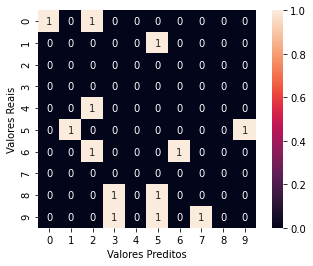

In [27]:
import matplotlib.pyplot as plt

sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

### Decision Tree


Text(83.40000000000006, 0.5, 'Valores Reais')

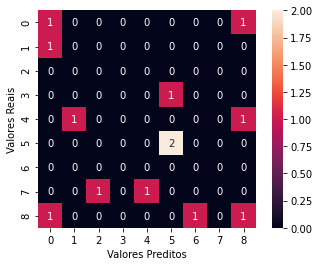

In [28]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

## Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X_tft, y_tft, cv = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.18181818, 0.3       , 0.1       , 0.3       , 0.2       ])

In [30]:
model_bayes_cv = GaussianNB()                       # 2
cross_val_score(model_bayes_cv, X_tft, y_tft, cv = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.27272727, 0.1       , 0.1       , 0.2       , 0.4       ])

### Leave One Out

In [0]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_bayes_cv, X_tft, y_tft, cv=LeaveOneOut())

In [32]:
scores

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [33]:
scores.mean()

0.2549019607843137